# Classification

In [1]:
# Using the HR data predict an employee is leaving or not

In [31]:
import pandas as pd # Importing pandas library to perform operation on dataframe
import matplotlib.pyplot as plt # Importing matplotlib to visualise data points
%matplotlib inline

In [32]:
data = pd.read_csv('C:\\users\\sameer\\Desktop\\Datasets\\hrdata.csv') # Importing dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
data.describe() # Statistical information about the variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [34]:
data.info() # Checking data type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [35]:
# dividing the dataframe into those who left and those who retained
left = data[data.left==0]
left.shape

(11428, 10)

In [36]:
not_left = data[data.left==1]
not_left.shape

(3571, 10)

In [37]:
# Average number of all columns
data.groupby(data.left).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [38]:
# Satisfaction level, average monthly hours seems to be little impactful and promotion seems to be bigger

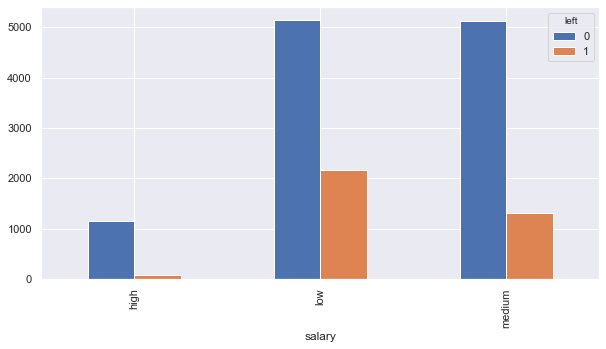

In [39]:
# Impact of salary on employee retention
pd.crosstab(data.salary,data.left).plot(kind = 'bar',figsize = (10,5))

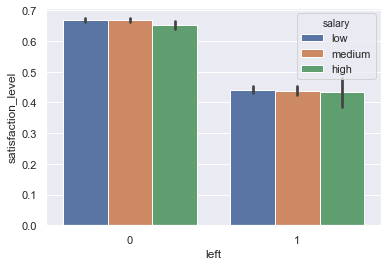

In [40]:
ax = sns.barplot(x="left", y="satisfaction_level", hue="salary", data=data)

In [41]:
# graph shows high salaries are not likely to leave company

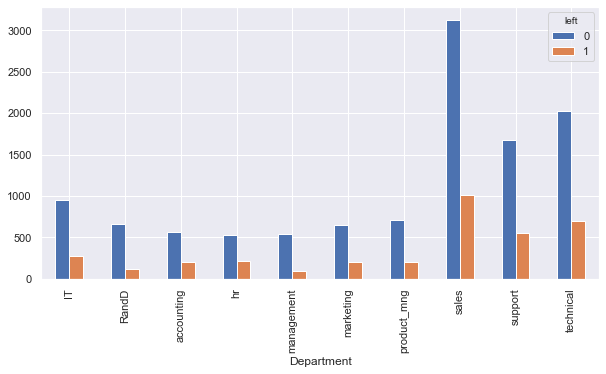

In [42]:
# impact of department on employee retention
pd.crosstab(data.Department,data.left).plot(kind = 'bar',figsize = (10,5))

In [43]:
import seaborn as sns
sns.set(style="darkgrid")

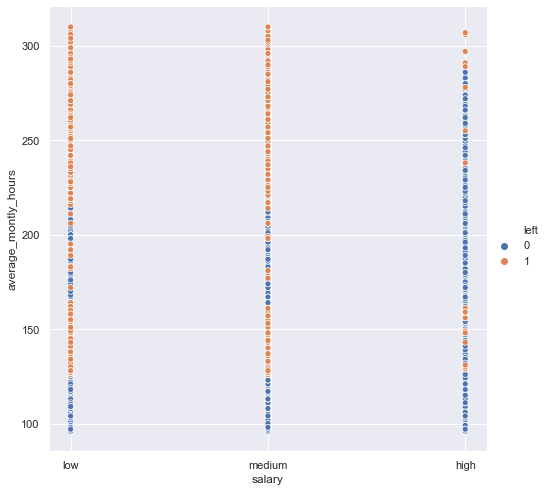

In [44]:
# Dynamic relationship between average_montly_hours, salary, left
sns.relplot(x="salary", y="average_montly_hours", hue="left", data=data,height = 7);

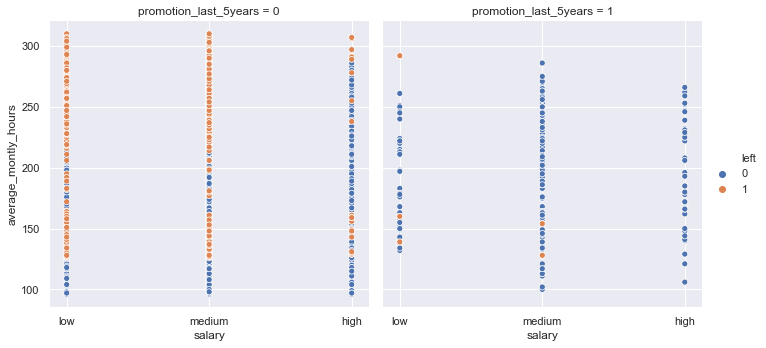

In [45]:
# Dynamic relationship between average_montly_hours, salary, left and promotion_last_5years
sns.relplot(x="salary", y="average_montly_hours", hue="left",
            col="promotion_last_5years", data=data);

In [46]:
# graph show some impact of departments but not majorly, so ignore

In [47]:
# From exploratory data analysis we can conclude independent variables as 
# Satisfaction level
# Average working hours
# Promotion
# Salary

In [48]:
sub_data = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sub_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [49]:
# tackle salary dummy variable
sal = pd.get_dummies(sub_data.salary,prefix='salary')
sal.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [50]:
new_data = pd.concat([sub_data,sal],axis = 'columns') # concat the dummy variable and original dataframes
new_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [51]:
new_data.drop('salary',inplace = True,axis = 'columns') # droping 'salary' column after encoding the text data

In [52]:
new_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [53]:
X = new_data # Independent variables datframe

In [54]:
y = data.left # Dependent Variable

In [55]:
from sklearn.model_selection import train_test_split # Importing train-test split from sklearn

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [57]:
from sklearn.linear_model import LogisticRegression # Importing logistic regression model

In [58]:
model = LogisticRegression(solver = 'liblinear')

In [59]:
model_fit = model.fit(X_train,y_train) # fitting the model

In [60]:
model_fit.predict(X_test) # predicting the values of 'y' on 'X_test'

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
model_fit.score(X_test,y_test) # model score

0.7824444444444445

In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.linear_model import LogisticRegression
cv = ShuffleSplit(n_splits = 5,test_size = 0.3,random_state = 100)
cross_val_score(LogisticRegression(solver = 'liblinear'),X_train,y_train,cv=cv)

array([0.77047619, 0.76507937, 0.76571429, 0.76825397, 0.77238095])

In [31]:
from sklearn import svm

In [33]:
cross_val_score(svm.SVC(kernel = 'rbf', C=1, gamma = 'auto'),X_train,y_train,cv = 5)

array([0.85007139, 0.84238095, 0.85238095, 0.84421153, 0.85564555])

In [36]:
cross_val_score(RandomForestClassifier(n_estimators =1,max_depth = 3),X_train,y_train,cv = 5)

array([0.82865302, 0.77619048, 0.77619048, 0.83992377, 0.77798952])

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Performing above process with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [39]:
model_params = {
    'svm':{
        'model':svm.SVC(),
        'params':{
            'C':[1,10,20],
            'gamma':[1.0,1.5,2.0,2.5]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10],
            'max_depth':[3,4,5]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,10,20],
            'solver':['lbfgs', 'liblinear']
        }
    },
    'nb_G':{
        'model':GaussianNB(),
        'params':{
            'var_smoothing':[1e-09,1e-08,1e-07]
        }
    },
    'nb_M':{
        'model':MultinomialNB(),
        'params':{
            'alpha':[1.0,1.5,]
        }
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[3,4]
        }
    }
}

In [40]:
# Appending the score in a list after fitting the model to each parameter for best result
scores = []
for model_name,mp in model_params.items(): # Iteration of items in the dictionary above
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False, iid = False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best':clf.best_score_, # Best score of the model
        'best_param':clf.best_params_  # Best parameter combination of the model
    })

In [41]:
scores

[{'model': 'svm',
  'best': 0.8737974882382815,
  'best_param': {'C': 20, 'gamma': 2.5}},
 {'model': 'random_forest',
  'best': 0.904656812760966,
  'best_param': {'max_depth': 5, 'n_estimators': 5}},
 {'model': 'logistic_regression',
  'best': 0.7686449122723589,
  'best_param': {'C': 1, 'solver': 'lbfgs'}},
 {'model': 'nb_G',
  'best': 0.7024489399355117,
  'best_param': {'var_smoothing': 1e-07}},
 {'model': 'nb_M', 'best': 0.7551195585089161, 'best_param': {'alpha': 1.0}},
 {'model': 'Decision_tree',
  'best': 0.9062758149637415,
  'best_param': {'criterion': 'gini', 'max_depth': 4}}]

In [ ]:
# Best model seems to be Decision Tree classifier with parameter (criterion = 'gini',max_depth=4)

In [63]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)

In [64]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
yhat = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
cnf_matrix

array([[ 730,  337],
       [  59, 3374]], dtype=int64)